<a href="https://colab.research.google.com/github/MinAKwhynot/jenkins-argo-test/blob/main/14lab_M.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 임포트

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

# 아이리스

## 아이리스 데이터 가져오기

In [ ]:
data= load_iris()

## x와 y 분리하기

In [ ]:
y=data.target
x=data.data

## 훈련, 테스트 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y, test_size=.2,random_state=1)

## 랜덤 포레스트 모델 구축

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

## 평가

In [ ]:
rf.score(x_test,y_test)

0.9666666666666667

In [ ]:
from sklearn.metrics import accuracy_score
rf_score=accuracy_score(y_test,rf.predict(x_test))
rf_score

0.9666666666666667

## 교차 검증

In [ ]:
x_test.shape

(30, 4)

In [ ]:
from sklearn.model_selection import cross_val_score
rf_cv=cross_val_score(rf,x_test,y_test, scoring="accuracy", cv= 10)
rf_cv

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.66666667, 1.        , 0.66666667])

평가율은 높아도 교차 검증을 보면 오차가 심한 것을 알수 있다.  
이렇게 되면 좀 고민해야하는 부분이 생기는 것이다.

##  로지스틱 회귀분석

In [ ]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()  #개체화
log_model.fit(x_train,y_train)  #학습
log_score=log_model.score(x_test,y_test)  #평가
log_cv=cross_val_score(log_model,x_test,y_test, scoring="accuracy", cv= 10)  #교차검증

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/s

In [ ]:
print(log_score)
print(log_cv)

0.9666666666666667
[1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.66666667]


이렇게 보면 로지스틱 교차검증이 더 안정적으로 나왔다.

In [ ]:
log_model.coef_  #기울기

array([[-0.43255698,  0.8254623 , -2.35015091, -0.96680366],
       [ 0.61953282, -0.42957975, -0.20773454, -0.82997154],
       [-0.18697584, -0.39588255,  2.55788545,  1.7967752 ]])

In [ ]:
log_model.intercept_  #절편

array([  9.48556685,   1.64065785, -11.12622471])

## 스테이트모델 ols

In [ ]:
import statsmodels.api as sm
model= sm.OLS(y_train,sm.add_constant(x_train)).fit()#sm.add_constant(x_train) 절편 구하기
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     418.5
Date:                Wed, 23 Nov 2022   Prob (F-statistic):           1.61e-67
Time:                        14:15:07   Log-Likelihood:                 16.662
No. Observations:                 120   AIC:                            -23.32
Df Residuals:                     115   BIC:                            -9.386
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3994      0.232      1.723      0.088      -0.060       0.859
x1            -0.2162      0.066     -3.292      0.001      -0.346      -0.086
x2             0.0142      0.066      0.215      0.830      -0.117       0.146
x3             0.3316      0.067      4.947      0.000       0.199       0.464
x4             0.4909      0.107      4.579      0.000       0.279       0.703
==============================================================================
Omnibus:                        2.868   Durbin-Watson:                   1.813
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                2.323
Skew:                          -0.252   Prob(JB):                        0.313
Kurtosis:                       3.460   Cond. No.                         94.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model= sm.MNLogit(y_train,x_train).fit()
model.summary()

         Current function value: 0.072967
         Iterations: 35


C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:                        MNLogit   Df Residuals:                      112
Method:                           MLE   Df Model:                            6
Date:                Wed, 23 Nov 2022   Pseudo R-squ.:                  0.9334
Time:                        14:15:07   Log-Likelihood:                -8.7560
converged:                      False   LL-Null:                       -131.51
Covariance Type:            nonrobust   LLR p-value:                 3.732e-50
==============================================================================
       y=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -6.1860    9.8e+04  -6.31e-05      1.000   -1.92e+05    1.92e+05
x2           -11.2666   1.49e+05  -7.58e-05      1.000   -2.91e+05    2.91e+05
x3            22.1564   1.43e+05      0.000      1.000   -2.79e+05    2.79e+05
x4             7.8683   3.16e+05   2.49e-05      1.000   -6.19e+05    6.19e+05
------------------------------------------------------------------------------
       y=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1           -11.9365    9.8e+04     -0.000      1.000   -1.92e+05    1.92e+05
x2           -16.7233   1.49e+05     -0.000      1.000   -2.91e+05    2.91e+05
x3            29.4099   1.43e+05      0.000      1.000   -2.79e+05    2.79e+05
x4            17.4267   3.16e+05   5.51e-05      1.000   -6.19e+05     6.2e+05
==============================================================================
"""

## 의사 결정 나무 트리

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier(random_state=1)
dt.fit(x_train,y_train)
dt_score=dt.score(x_test,y_test)
dt_cv=cross_val_score(dt,x_test,y_test, scoring="accuracy", cv= 10)  #교차검증


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


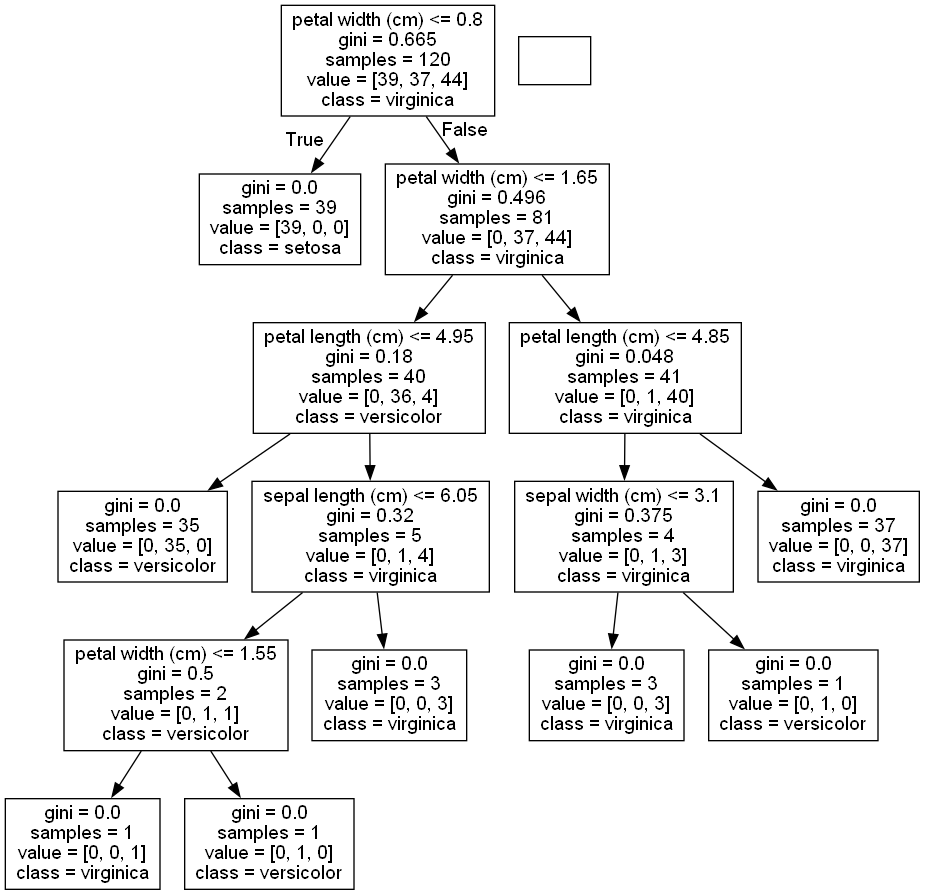

In [ ]:
from IPython.display import Image
from sklearn import tree
import pydotplus
dot_data = tree.export_graphviz(dt, out_file=None,
                                feature_names=data.feature_names,
                                class_names=data.target_names)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## 모델 비교

In [ ]:
mean=[log_cv.mean(),dt_cv.mean(),rf_cv.mean()]
stds=[log_cv.std(),dt_cv.std(),rf_cv.std()]
tab=pd.DataFrame({'mean':mean,'stds':stds},index=['Logistic Regression','Decision tree','Random Forest'])
print(tab)

                         mean      stds
Logistic Regression  0.966667  0.100000
Decision tree        0.900000  0.152753
Random Forest        0.933333  0.133333


## 박스플랏으로 모델비교

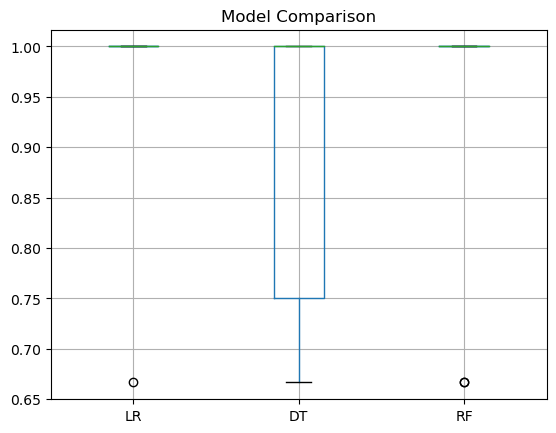

In [ ]:
#박스플랏으로 모델비교
ctab = pd.DataFrame({
    'LR': log_cv,
    'DT': dt_cv,
    'RF': rf_cv})

ctab.boxplot()
plt.title('Model Comparison')
plt.show()


## 실제 데이터 예측

In [ ]:
log_model.predict(x[0].reshape(1,-1))   #setosa라고 예측해준다

array([0])

## 아이리스 혼동행렬

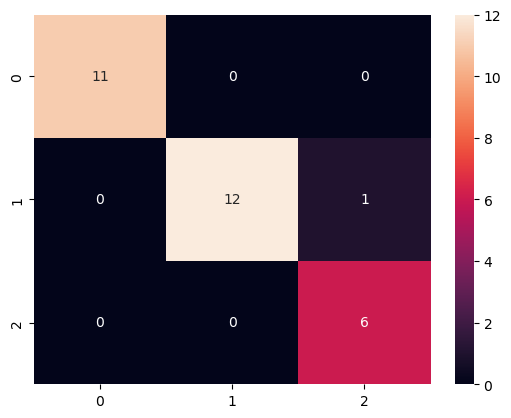

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,log_model.predict(x_test))
sns.heatmap(cm,annot=True)
# plt.xlabel('predictd')
# plt.ylabel('actual')
plt.show()
#y값이 먼저

## 맷플라립 초기화

In [ ]:
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

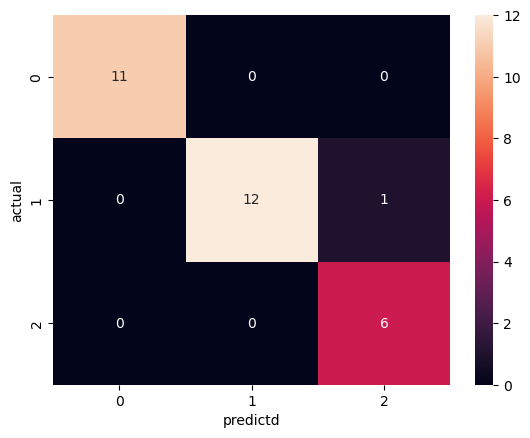

In [ ]:
sns.heatmap(cm,annot=True)
plt.xlabel("predictd")
plt.ylabel('actual')
plt.show()

## 분류 리포트

In [ ]:
from sklearn.metrics import classification_report
classification_report(y_test,log_model.predict(x_test))

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        11\n           1       1.00      0.92      0.96        13\n           2       0.86      1.00      0.92         6\n\n    accuracy                           0.97        30\n   macro avg       0.95      0.97      0.96        30\nweighted avg       0.97      0.97      0.97        30\n'

In [ ]:
print(classification_report(y_test,log_model.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



## 락커브 - 이진분류에서만 사용할 수 있음

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(log_model,x_test,y_test)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


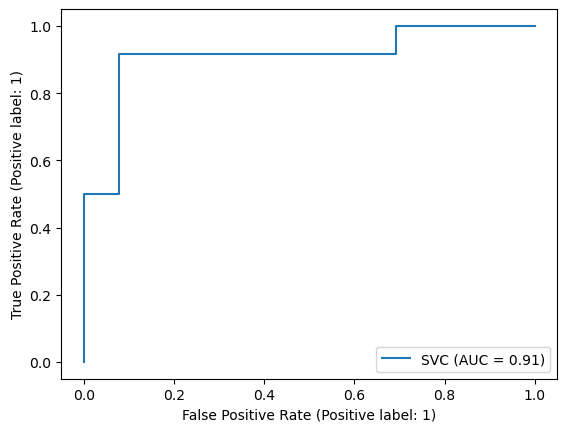

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection, svm
X, y = datasets.make_classification(random_state=0)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=0)
clf = svm.SVC(random_state=0)
clf.fit(X_train, y_train)
metrics.plot_roc_curve(clf, X_test, y_test)

plt.show()

In [ ]:
# !jupyter --data-dir

# tips

## 데이터 불러오기

In [ ]:
data_2=sns.load_dataset('tips')

In [ ]:
data_2

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## 인코딩

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()

dummies_2= pd.DataFrame(ohe.fit_transform(data_2[['sex','smoker','day','time']]).toarray(),
                      columns=ohe.get_feature_names())
dummies_2

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,x0_Female,x0_Male,x1_No,x1_Yes,x2_Fri,x2_Sat,x2_Sun,x2_Thur,x3_Dinner,x3_Lunch
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
239,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
240,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
241,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
242,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [ ]:
dummies_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   x0_Female  244 non-null    float64
 1   x0_Male    244 non-null    float64
 2   x1_No      244 non-null    float64
 3   x1_Yes     244 non-null    float64
 4   x2_Fri     244 non-null    float64
 5   x2_Sat     244 non-null    float64
 6   x2_Sun     244 non-null    float64
 7   x2_Thur    244 non-null    float64
 8   x3_Dinner  244 non-null    float64
 9   x3_Lunch   244 non-null    float64
dtypes: float64(10)
memory usage: 19.2 KB


In [ ]:
dummies_2=dummies_2.astype('int64')

In [ ]:
data_2_1=pd.concat([data_2,dummies_2],axis=1)
data_2_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
 7   x0_Female   244 non-null    int64   
 8   x0_Male     244 non-null    int64   
 9   x1_No       244 non-null    int64   
 10  x1_Yes      244 non-null    int64   
 11  x2_Fri      244 non-null    int64   
 12  x2_Sat      244 non-null    int64   
 13  x2_Sun      244 non-null    int64   
 14  x2_Thur     244 non-null    int64   
 15  x3_Dinner   244 non-null    int64   
 16  x3_Lunch    244 non-null    int64   
dtypes: category(4), float64(2), int64(11)
memory usage: 26.4 KB


In [ ]:
data_2_f=data_2_1[[ i for i in data_2_1.columns if i not in['sex','smoker','day','time']]]
data_2_f

,total_bill,tip,size,x0_Female,x0_Male,x1_No,x1_Yes,x2_Fri,x2_Sat,x2_Sun,x2_Thur,x3_Dinner,x3_Lunch
0,16.99,1.01,2,1,0,1,0,0,0,1,0,1,0
1,10.34,1.66,3,0,1,1,0,0,0,1,0,1,0
2,21.01,3.50,3,0,1,1,0,0,0,1,0,1,0
3,23.68,3.31,2,0,1,1,0,0,0,1,0,1,0
4,24.59,3.61,4,1,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,0,1,1,0,0,1,0,0,1,0
240,27.18,2.00,2,1,0,0,1,0,1,0,0,1,0
241,22.67,2.00,2,0,1,0,1,0,1,0,0,1,0
242,17.82,1.75,2,0,1,1,0,0,1,0,0,1,0


In [ ]:
data_2_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   size        244 non-null    int64  
 3   x0_Female   244 non-null    int64  
 4   x0_Male     244 non-null    int64  
 5   x1_No       244 non-null    int64  
 6   x1_Yes      244 non-null    int64  
 7   x2_Fri      244 non-null    int64  
 8   x2_Sat      244 non-null    int64  
 9   x2_Sun      244 non-null    int64  
 10  x2_Thur     244 non-null    int64  
 11  x3_Dinner   244 non-null    int64  
 12  x3_Lunch    244 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 24.9 KB


## x와 y 분리하기

In [ ]:
data_2_f.tip

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

In [ ]:
y=data_2_f.tip
x=data_2_f.drop("tip",axis=1)

## 다시 분류하기

In [ ]:
# y=data_2_f.tip
# # x=data_2_f.drop("tip",axis=1)
# x=data_2_f[['size','total_bill']]

In [ ]:
# y=data_2_f.tip
# # x=data_2_f.drop("tip",axis=1)
# x=data_2_f['total_bill']

## 훈련, 테스트 분리

In [ ]:
x_train, x_test,y_train, y_test = train_test_split(x,y, test_size=.2,random_state=1)

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()  #개체화
lr.fit(x_train,y_train)  #학습
lr_score=lr.score(x_test,y_test)  #평가
lr_cv=cross_val_score(lr,x_test,y_test, scoring="r2", cv= 10)  #교차검증
print(lr_score)
print(lr_cv)

0.48758172543493583
[ 0.71052216 -0.32042701  0.59296707  0.0645839  -0.31645947 -0.08786366
  0.95052551  0.86199706  0.75099457 -1.80706594]


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt= DecisionTreeRegressor(random_state=1)
dt.fit(x_train,y_train)
dt_score=dt.score(x_test,y_test)
dt_cv=cross_val_score(dt,x_test,y_test, scoring="r2", cv= 10)  #교차검증
print(dt_score)
print(dt_cv)

0.04783127960093225
[ 0.19598926  0.8282474   0.2847427   0.28340616  0.44158388 -0.46096908
  0.95907487 -0.10233427 -0.66487541 -0.20531835]


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor()
rf.fit(x_train,y_train)
rf_score=rf.score(x_test,y_test)
rf_cv=cross_val_score(rf,x_test,y_test, cv=10, scoring= 'r2')
print(rf_score)
print(rf_cv)

0.5818128637404889
[ 0.50975452  0.2563078   0.28156506 -0.00238855  0.53004317 -0.06765954
  0.85248867  0.70081794 -0.4151313   0.86597894]


R^2가  낮은 경우 , 변수의 갯수를 바꿔서 최적의 변수 조합을 찾음

## 모델 비교

### 테이블 비교

In [ ]:
mean=[lr_cv.mean(),dt_cv.mean(),rf_cv.mean()]
stds=[lr_cv.std(),dt_cv.std(),rf_cv.std()]
tab=pd.DataFrame({'mean':mean,'stds':stds},index=['Linear Regression','Decision tree','Random Forest'])
print(tab)

                       mean      stds
Linear Regression  0.139977  0.796947
Decision tree      0.155955  0.496446
Random Forest      0.351178  0.399654


### 박스 플롯 비교

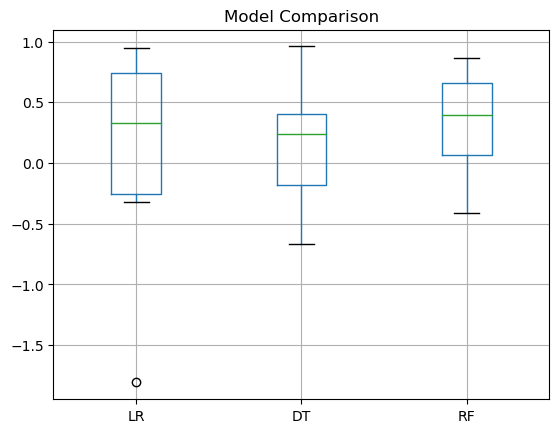

In [ ]:
ctab = pd.DataFrame({
    'LR': lr_cv,
    'DT': dt_cv,
    'RF': rf_cv})

ctab.boxplot()
plt.title('Model Comparison')
plt.show()


## 실제 예측

In [ ]:
a=x.loc[0]

In [ ]:
rf.predict(a.values.reshape(1,-1))

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([1.8793])

In [ ]:
y.loc[0]

1.01

In [ ]:
x.iloc[0]

total_bill    16.99
size           2.00
x0_Female      1.00
x0_Male        0.00
x1_No          1.00
x1_Yes         0.00
x2_Fri         0.00
x2_Sat         0.00
x2_Sun         1.00
x2_Thur        0.00
x3_Dinner      1.00
x3_Lunch       0.00
Name: 0, dtype: float64

In [ ]:
test_data=pd.DataFrame({'total_bill': 16.99,
                        'sex':0,
                        'smoker':0,
                        'day':2,
                        'time':0,
                        'size': 2}, index=[0])

In [ ]:
# rf.predict(test_data)

# 스케일링  
https://chrisalbon.com/code/python/data_wrangling/pandas_normalize_column/


In [ ]:
import pandas as pd
from sklearn import preprocessing


int64


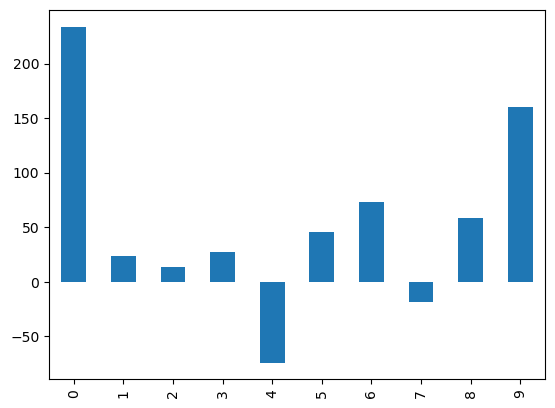

In [ ]:
data = {'score': [234,24,14,27,-74,46,73,-18,59,160]}
df = pd.DataFrame(data)
df.score.plot(kind='bar')
print(df.score.dtypes) #정수차입임으로
x=df.score.values.astype(float) #소수점으로 변환시키는 건데 사실상여기서 없어도 되는 프로세스같다고 했다.
plt.show()

In [ ]:
print(type(df))
print(type(x))
## 처음부터 데이터프레임으로 생성했기 때문에 시리즈가 아닌 데이터프레임이다.

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [ ]:
x

array([234.,  24.,  14.,  27., -74.,  46.,  73., -18.,  59., 160.])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
#feature_range = (0, 1) 범위를 줄수 있다.

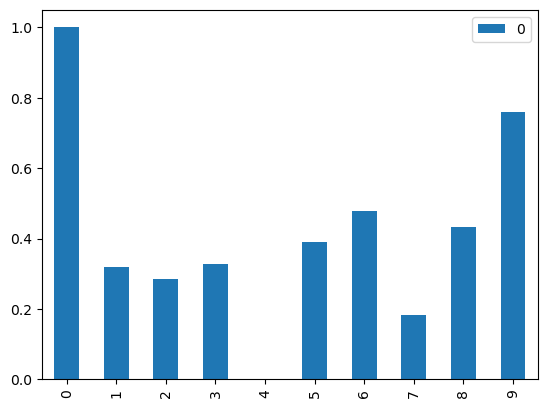

In [ ]:
# x_scaled=scaler.fit_transform(x.reshape(-1,1))
#소수로 바꾸는 작업을 안할 때는 아래 방법으로 해도 상관이 없을 것이다.
x_scaled=scaler.fit_transform(df.score.values.reshape(-1,1))
df_normalized=pd.DataFrame(x_scaled)
# 판다스의 바플롯이 데이터프레임으로 가능하기때문에 array를 다시 df로 변환한것이다.
df_normalized.plot(kind='bar')
plt.show()

In [ ]:
df_normalized

,0
0,1.000000
1,0.318182
2,0.285714
3,0.327922
4,0.000000
5,0.389610
6,0.477273
7,0.181818
8,0.431818
9,0.759740


## 스케일 당뇨 예제

preg = Number of times pregnant. 임신 횟수   
plas = Plasma glucose concentration a 2 hours in an oral glucose tolerance test. 혈장 포도당 농도  
pres = Diastolic blood pressure (mm Hg). 이완성 혈압  
skin = Triceps skin fold thickness (mm). 피부두께  
test = 2-Hour serum insulin (mu U/ml). 혈청 인슐린   
mass = Body mass index (weight in kg/(height in m)^2). 체질량지수  
pedi = Diabetes pedigree function. 당뇨병 혈통   
age = Age (years). 나이  
class = Class variable (1:tested positive for diabetes, 0: tested negative for diabetes). 1은 당뇨양성, 0은 당뇨음성


In [ ]:
dat=pd.read_csv("G:\\내 드라이브\\pima-indians-diabetes.csv",)


In [ ]:
a=pd.DataFrame(np.array(dat.columns).reshape(1,-1),columns=['preg','plas','pres','skin','test','mass','pedi','age','class'])
print(a)

  preg plas pres skin test  mass   pedi age class
0    6  148   72   35    0  33.6  0.627  50     1


In [ ]:
data=pd.DataFrame(columns=['preg','plas','pres','skin','test','mass','pedi','age','class'])
data

,preg,plas,pres,skin,test,mass,pedi,age,class


In [ ]:
data=pd.concat([data,a],axis=0)
data

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1


In [ ]:
dat.columns=['preg','plas','pres','skin','test','mass','pedi','age','class']
dat

,preg,plas,pres,skin,test,mass,pedi,age,class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
data=pd.concat([data,dat],axis=0,ignore_index=True)
data

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.34,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
data=pd.read_csv("G:\\내 드라이브\\pima-indians-diabetes.csv",header=None)
data.columns=['preg','plas','pres','skin','test','mass','pedi','age','class']

In [ ]:
data.head(20)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
data.shape

(768, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


![image.png](attachment:image.png)

In [ ]:
data.groupby('class').size()

class
0    500
1    268
dtype: int64

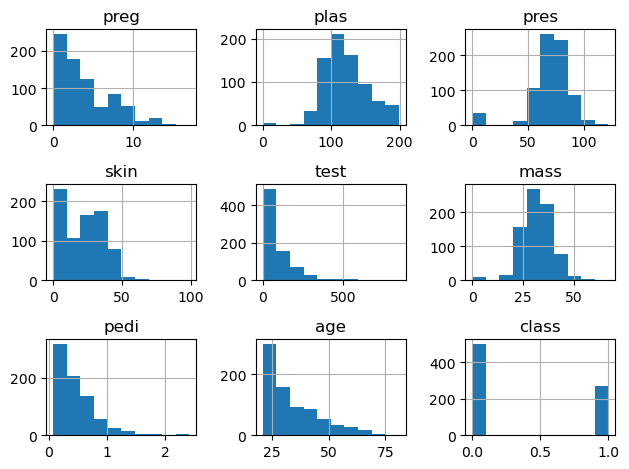

In [ ]:
data.hist()
plt.tight_layout()
plt.show()

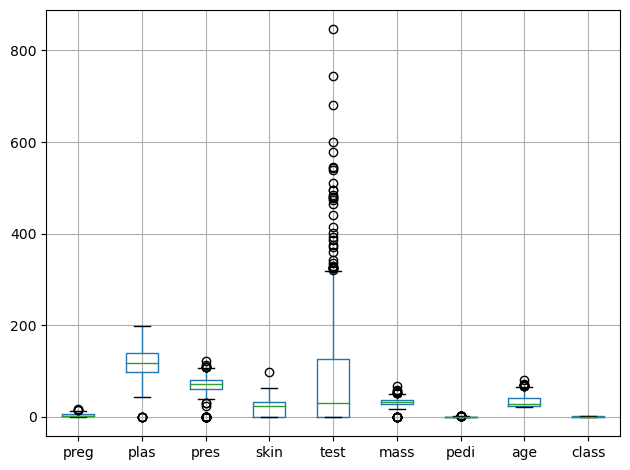

In [ ]:
data.boxplot()
plt.tight_layout()
plt.show()

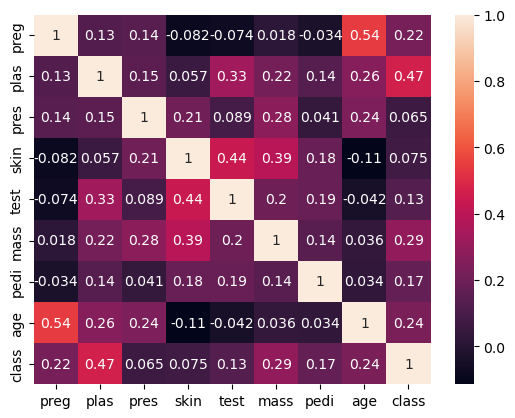

In [ ]:
sns.heatmap(data.corr(),annot=True)
# plt.tight_layout()
plt.show()

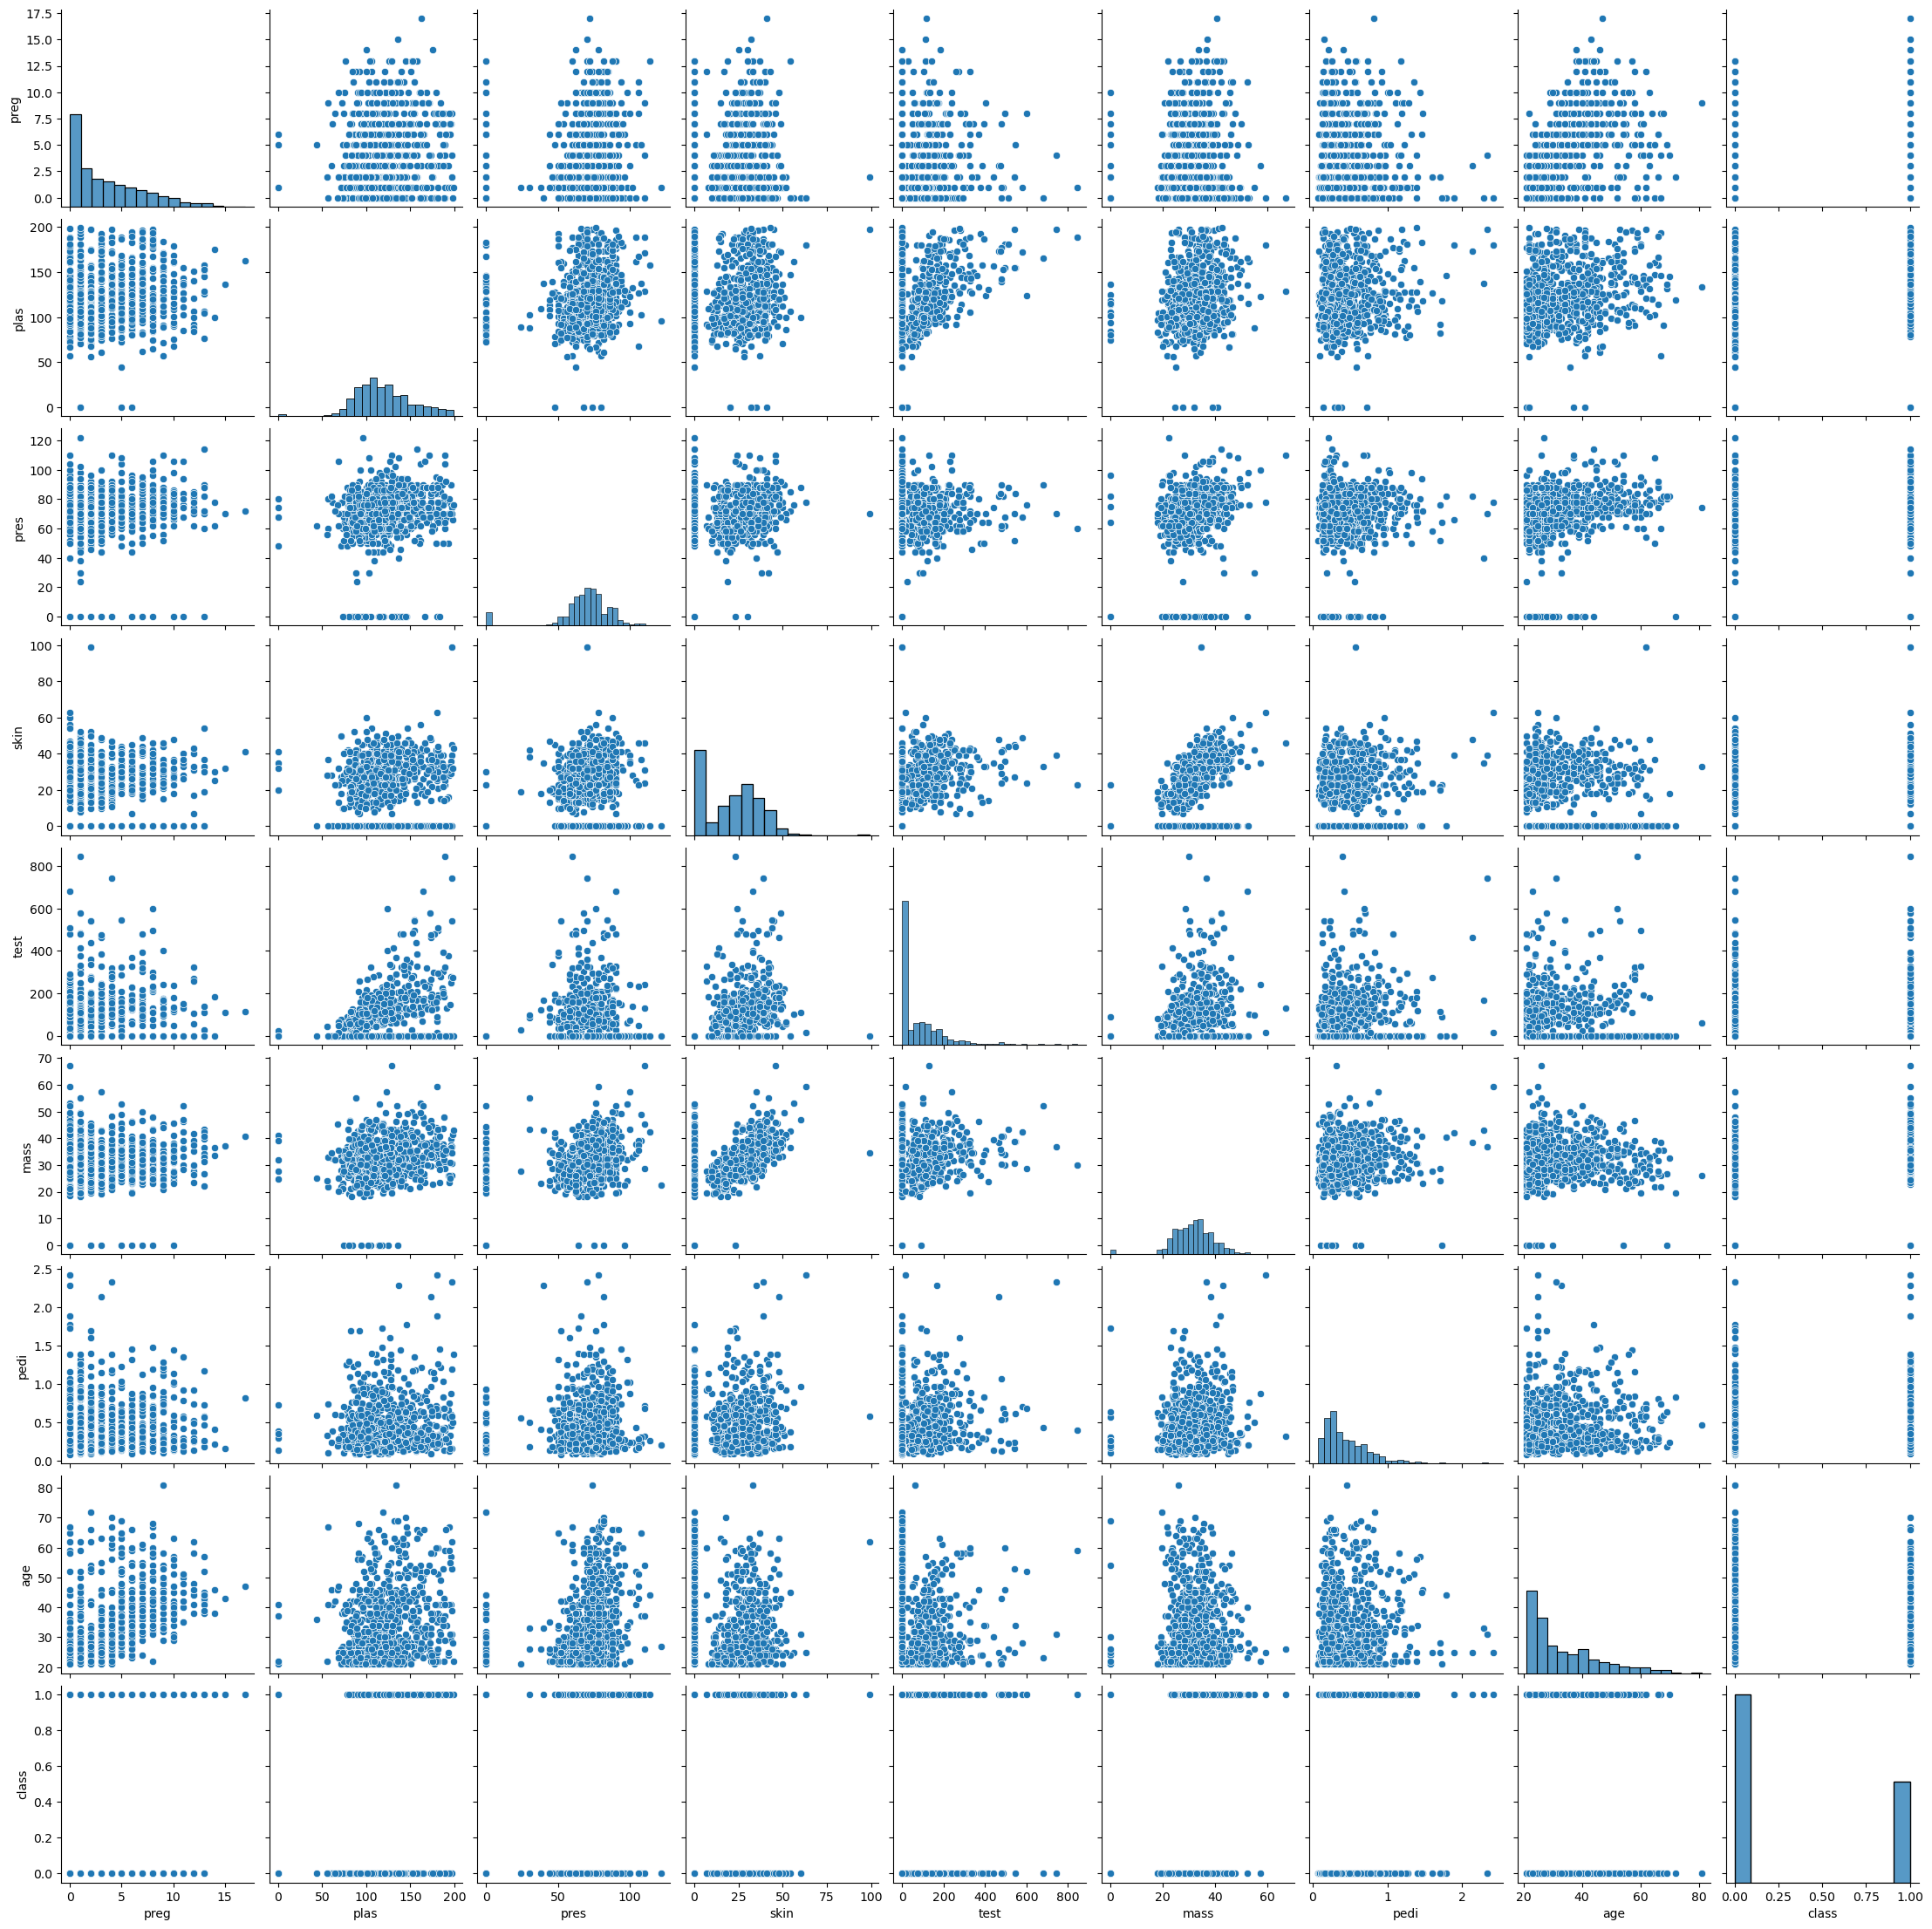

In [ ]:
sns.pairplot(data)
# plt.tight_layout()
plt.show()

![image.png](attachment:image.png)

In [ ]:
data.columns

Index(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'], dtype='object')

## x,y분리

In [ ]:
y=data['class']
x=data.drop("class",axis=1)

## 훈련, 테스트분리

In [ ]:
x_train, x_test,y_train, y_test = train_test_split(x,y, test_size=.2,random_state=3)

## LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=3)  #개체화
lr.fit(x_train,y_train)  #학습
lr_score=lr.score(x_test,y_test)  #평가
lr_cv=cross_val_score(lr,x_test,y_test, scoring="accuracy", cv= 10)  #교차검증
print(lr_score)
print(lr_cv)

0.7402597402597403
[0.9375     0.75       0.625      0.6875     0.86666667 0.73333333
 0.8        0.8        0.73333333 0.6       ]


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt= DecisionTreeRegressor(random_state=3)
dt.fit(x_train,y_train)
dt_score=dt.score(x_test,y_test)
dt_cv=cross_val_score(dt,x_test,y_test, scoring="accuracy", cv= 10)  #교차검증
print(dt_score)
print(dt_cv)

-0.34992987377279094
[0.5        0.75       0.5        0.625      0.6        0.46666667
 0.6        0.66666667 0.46666667 0.66666667]


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(random_state=3)
rf.fit(x_train,y_train)
rf_score=rf.score(x_test,y_test)
rf_cv=cross_val_score(rf,x_test,y_test, cv=10, scoring= 'accuracy')
print(rf_score)
print(rf_cv)

0.7402597402597403
[0.9375     0.6875     0.5        0.6875     0.8        0.8
 0.86666667 0.93333333 0.66666667 0.66666667]


## 모델 비교

### 테이블 비교

In [ ]:
mean=[lr_cv.mean(),dt_cv.mean(),rf_cv.mean()]
stds=[lr_cv.std(),dt_cv.std(),rf_cv.std()]
tab=pd.DataFrame({'mean':mean,'stds':stds},index=['LogisticRegression','Decision tree','Random Forest'])
print(tab)

                        mean      stds
LogisticRegression  0.753333  0.098104
Decision tree       0.584167  0.092229
Random Forest       0.754583  0.130908


### 박스 플롯 비교

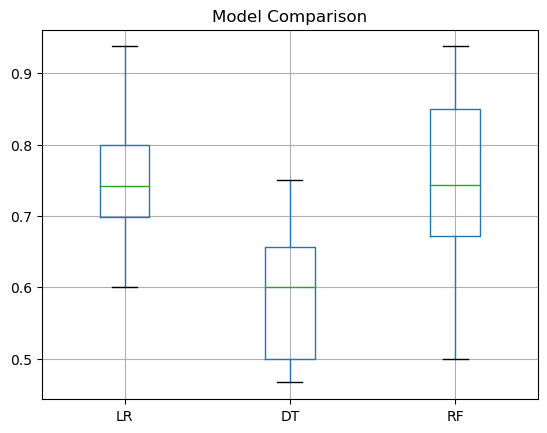

In [ ]:
ctab = pd.DataFrame({
    'LR': lr_cv,
    'DT': dt_cv,
    'RF': rf_cv})

ctab.boxplot()
plt.title('Model Comparison')
plt.show()


## 실제 예측

In [ ]:
a=x.loc[0]
a

preg      6.000
plas    148.000
pres     72.000
skin     35.000
test      0.000
mass     33.600
pedi      0.627
age      50.000
Name: 0, dtype: float64

In [ ]:
rf.predict(a.values.reshape(1,-1))

array([1], dtype=int64)

In [ ]:
y.loc[0]

1

In [ ]:
x.iloc[0]

preg      6.000
plas    148.000
pres     72.000
skin     35.000
test      0.000
mass     33.600
pedi      0.627
age      50.000
Name: 0, dtype: float64

In [ ]:
def num(i):
    info=x.loc[i]
    aka=rf.predict(a.values.reshape(1,-1))
    ans=y.loc[i]

In [ ]:
x.index

RangeIndex(start=0, stop=768, step=1)

In [ ]:
from random import randint

In [ ]:
a=randint(0,768)
print(a)
test_data=pd.DataFrame(x.loc[a].values.reshape(1,-1))
print(test_data)
rf.predict(test_data)

133
     0     1     2     3    4     5      6     7
0  8.0  84.0  74.0  31.0  0.0  38.3  0.457  39.0


array([0], dtype=int64)

In [ ]:
rf.predict(test_data)

array([0], dtype=int64)

## 혼동행렬

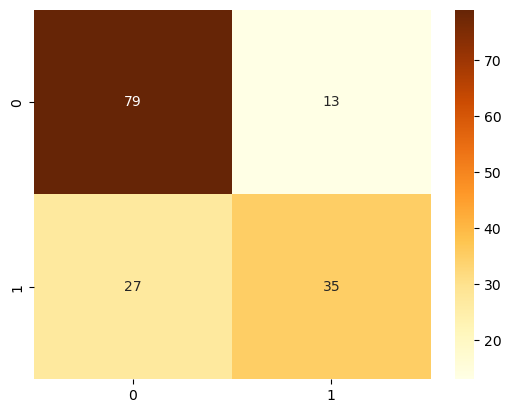

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,rf.predict(x_test))
sns.heatmap(cm,annot=True,cmap='YlOrBr')
# plt.xlabel('predictd')
# plt.ylabel('actual')
plt.show()
#y값이 먼저

## 분류 리포트

In [ ]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,rf.predict(x_test))
print(cr)

              precision    recall  f1-score   support

           0       0.75      0.86      0.80        92
           1       0.73      0.56      0.64        62

    accuracy                           0.74       154
   macro avg       0.74      0.71      0.72       154
weighted avg       0.74      0.74      0.73       154



# Roc

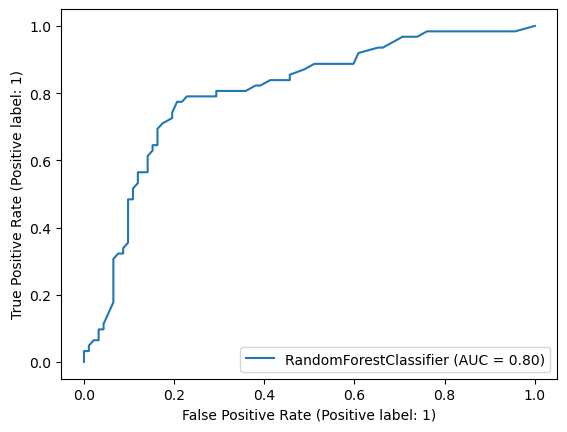

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rf,x_test,y_test)
plt.show()

## 스케일링

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
#feature_range = (0, 1) 범위를 줄수 있다.

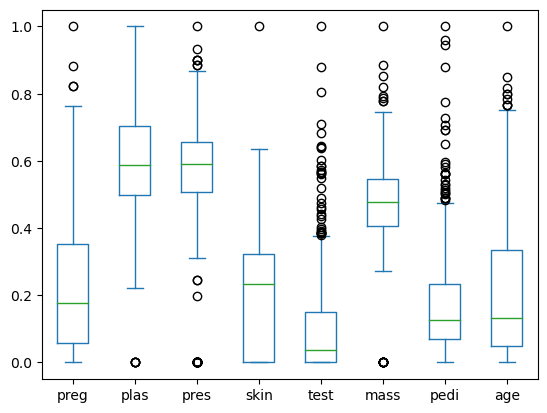

In [ ]:
# x_scaled=scaler.fit_transform(x.reshape(-1,1))
#소수로 바꾸는 작업을 안할 때는 아래 방법으로 해도 상관이 없을 것이다.
ticks=['preg','plas','pres','skin','test','mass','pedi','age']
x_scaled=scaler.fit_transform(x)
df_normalized=pd.DataFrame(x_scaled)
# 판다스의 바플롯이 데이터프레임으로 가능하기때문에 array를 다시 df로 변환한것이다.
df_normalized.plot(kind='box')
plt.xticks(range(1,len(x.columns)+1),x.columns)
# sns.boxplot(data=df_normalized)
# plt.xticks(ticks)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
#feature_range = (0, 1) 범위를 줄수 있다.

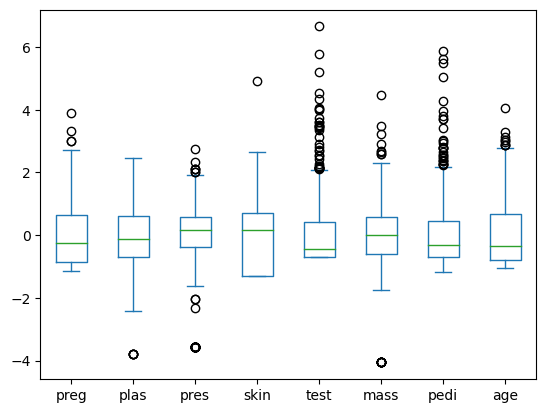

In [ ]:
# x_scaled=scaler.fit_transform(x.reshape(-1,1))
#소수로 바꾸는 작업을 안할 때는 아래 방법으로 해도 상관이 없을 것이다.
x_scaled=scaler.fit_transform(x)
df_normalized=pd.DataFrame(x_scaled)
# 판다스의 바플롯이 데이터프레임으로 가능하기때문에 array를 다시 df로 변환한것이다.
df_normalized.plot(kind='box')
plt.xticks(range(1,len(x.columns)+1),x.columns)
# sns.boxplot(data=df_normalized)
# plt.xticks(ticks)
plt.show()

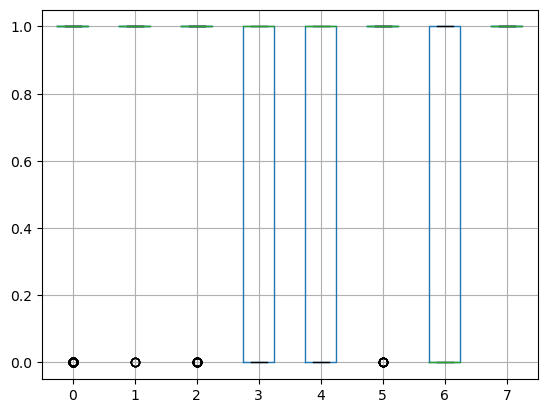

In [ ]:
from sklearn.preprocessing import Binarizer
pd.DataFrame(Binarizer(threshold=.5).transform(x)).boxplot()
plt.show()

In [ ]:
# x_scaled=scaler.fit_transform(x.reshape(-1,1))
#소수로 바꾸는 작업을 안할 때는 아래 방법으로 해도 상관이 없을 것이다.
x_scaled=scaler.fit_transform(x)
df_normalized=pd.DataFrame(x_scaled)
# 판다스의 바플롯이 데이터프레임으로 가능하기때문에 array를 다시 df로 변환한것이다.
df_normalized.plot(kind='box')
plt.xticks(range(1,len(x.columns)+1),x.columns)
# sns.boxplot(data=df_normalized)
# plt.xticks(ticks)
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'fit_transform'